In [1]:
# setup the matplotlib graphics library and configure it to show figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

In [3]:
Np = 10            # number of cavity fock states
Ne = 5             # number of exciton fock states
theta = np.pi/2    # phase factor
gamma = 0.5        # gamma

use_rwa = True     # Rotating wave approximation

In [4]:
# Operators

r_in  = tensor(destroy(Np), qeye(Ne), qeye(Ne))       # Incident photon

b0 = tensor(qeye(Np), destroy(Ne), qeye(Ne))          # Exciton 0
b1 = tensor(qeye(Np), qeye(Ne), destroy(Ne))          # Exciton 1

r_out = r_in - 1j*np.exp(1j*theta) * np.sqrt(gamma)*b0  # Transmitted photon
 
ne0 = b0.dag() * b0  # exciton0
ne1 = b1.dag() * b1  # exciton1
np_in = r_in.dag() * r_in  # photon right--in
np_out = r_out.dag() * r_out  # photon right--out

A = 1           # Exciton-Exciton interaction
B = -0.1        # Higher-order exciton-photon interaction   

In [23]:
we = 1.0  * 2 * np.pi  # exciton frequency
wc_vec = np.linspace(0.0, 3.0, 101) * 2 * np.pi # photon frequency

psi_list = []

g = 5;    # coupling strength

for wc in wc_vec:
    
    # decoupled Hamiltonian
    H0 = wc * (r_in.dag() * r_in + r_out.dag() * r_out) + we * (b0.dag() * b0 + b1.dag() * b1)

    # interaction Hamiltonian
    if use_rwa:
        H1 = g * (r_in.dag() * b0 + r_in * b0.dag() + r_out.dag() * b0 + r_out * b0.dag())
        H1 = H1 + A*(b0.dag()*b0.dag()*b0*b0) + B*(b0.dag()*b0.dag()*b0*r_in + r_in.dag()*b0.dag()*b0*b0)

    H = H0 + H1

    # find the groundstate and its energy
    gvals, gket = H.groundstate()

    # store the ground state
    psi_list.append(gket)

In [24]:
ne0_expt = expect(ne0, psi_list) # exciton occupation probability
ne1_expt = expect(ne1, psi_list) # exciton occupation probability
np_in_expt = expect(np_in, psi_list)   # photon occupation probability
np_out_expt = expect(np_out, psi_list)   # photon occupation probability

Text(0.5, 1, 'Occupational probability wrt Photon Frequency')

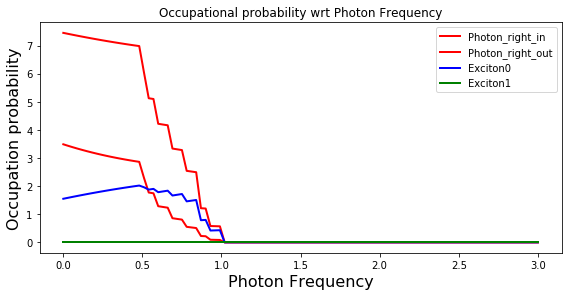

In [29]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(wc_vec/(2*np.pi), np_in_expt, 'r', linewidth=2, label="Photon_right_in")
axes.plot(wc_vec/(2*np.pi), np_out_expt, 'r', linewidth=2, label="Photon_right_out")
axes.plot(wc_vec/(2*np.pi), ne0_expt, 'b', linewidth=2, label="Exciton0")
axes.plot(wc_vec/(2*np.pi), ne1_expt, 'g', linewidth=2, label="Exciton1")
axes.set_ylabel("Occupation probability", fontsize=16)
axes.set_xlabel("Photon Frequency", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational probability wrt Photon Frequency")